In [2]:
import pandas as pd

In [3]:
import sys
import os
# Get the parent directory
parent_folder = os.path.dirname(os.getcwd())
#add the parent directory to the Python path so that the scripts can be imported
sys.path.append(parent_folder) 

In [4]:
from modules.point_reg import point_regressor

# Load data

In [5]:
# Load the data
# fname_ams='../data/nl/ams_data_merged_preprocessed.csv'
fname_ams='../data/nl/ams_data_merged_preprocessed.csv'
df_ams=pd.read_csv(fname_ams)

In [6]:
list_of_features = ['total_net_norm','irradiance_norm','zenith_norm', 'azimuth_norm','wind_speed_norm', 'temperature_norm',
                    'precipitation_norm', 'cloud_cover_norm', 'cos_HoD']
list_of_features_selected=['irradiance_norm', 'total_net_norm']
my_seed=42

In [7]:
point_reg=point_regressor(original_data=df_ams,list_of_features=list_of_features,random_seed=my_seed,irradiance_threshold=0.01)

X_train.shape: (8232, 9), X_test.shape: (757, 9), X_prop_train.shape: (7328, 9), X_cal.shape: (904, 9)


# Feature Selection

## Sequantial Feature Selection

with sci-kit learn

In [8]:
# point_reg.sequential_selection(direction='forward',n_features=5)

In [9]:
# point_reg.sequential_selection(direction='backward',n_features=5)

In [10]:
# # check the selected features in each iteration
# for i in range(5):
#     point_reg.sequential_selection(direction='forward',n_features=i+1)
#     print(f'Forward selection: {point_reg.forward_selected_features[i]}')
# for i in range(5):
#     point_reg.sequential_selection(direction='backward',n_features=i+1)
#     print(f'Backward selection: {point_reg.backward_selected_features[i]}')

with mlxtend, which provides better interface for selection details

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    2.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.5s finished

[2025-01-01 13:14:46] Features: 1/9 -- score: 0.903528349810115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.1s finished

[2025-01-01 13:14:50] Features: 2/9 -- score: 0.9021325218291721[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    6.2s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    6.5s finished

[2025-01-01 13:14:56] Features: 3/9 -- score: 0.9065805456508368[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6

forward selection: (0, 1, 2, 3, 4, 5, 6, 7, 8)
forward selected features: ['total_net_norm', 'irradiance_norm', 'zenith_norm', 'azimuth_norm', 'wind_speed_norm', 'temperature_norm', 'precipitation_norm', 'cloud_cover_norm', 'cos_HoD']

All Feature Subsets Evaluated:
Iteration 1:
Selected Features: (1,)
Performance: 0.903528349810115
Iteration 2:
Selected Features: (0, 1)
Performance: 0.9021325218291721
Iteration 3:
Selected Features: (0, 1, 4)
Performance: 0.9065805456508368
Iteration 4:
Selected Features: (0, 1, 4, 8)
Performance: 0.9091971687795531
Iteration 5:
Selected Features: (0, 1, 4, 6, 8)
Performance: 0.9104699551475225
Iteration 6:
Selected Features: (0, 1, 4, 6, 7, 8)
Performance: 0.911125230060542
Iteration 7:
Selected Features: (0, 1, 2, 4, 6, 7, 8)
Performance: 0.9097714476374895
Iteration 8:
Selected Features: (0, 1, 2, 3, 4, 6, 7, 8)
Performance: 0.9089077194830744
Iteration 9:
Selected Features: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Performance: 0.9044472297605303


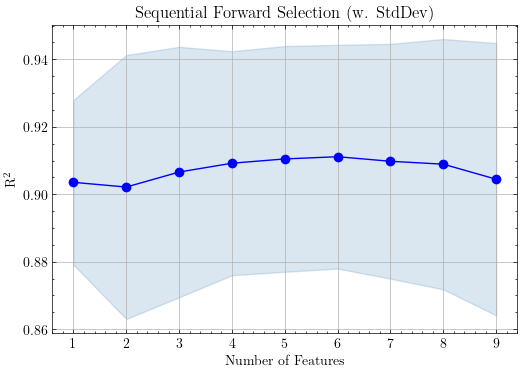

In [11]:
point_reg.sequential_selection_mlxtend(direction='forward',n_features=9)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   12.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   13.0s finished

[2025-01-01 13:15:35] Features: 8/1 -- score: 0.9089077194830744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    9.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.9s finished

[2025-01-01 13:15:45] Features: 7/1 -- score: 0.9097714476374895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    6.9s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    7.0s finished

[2025-01-01 13:15:52] Features: 6/1 -- score: 0.911125230060542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6

backward selection: (1,)
backward selected features: ['irradiance_norm']

All Feature Subsets Evaluated:
Iteration 1:
Selected Features: (0, 1, 2, 3, 4, 5, 6, 7, 8)
Performance: 0.9044472297605303
Iteration 2:
Selected Features: (0, 1, 2, 3, 4, 6, 7, 8)
Performance: 0.9089077194830744
Iteration 3:
Selected Features: (0, 1, 2, 4, 6, 7, 8)
Performance: 0.9097714476374895
Iteration 4:
Selected Features: (0, 1, 4, 6, 7, 8)
Performance: 0.911125230060542
Iteration 5:
Selected Features: (0, 1, 4, 6, 8)
Performance: 0.9104699551475225
Iteration 6:
Selected Features: (0, 1, 4, 8)
Performance: 0.9091971687795534
Iteration 7:
Selected Features: (0, 1, 4)
Performance: 0.9065805456508368
Iteration 8:
Selected Features: (0, 1)
Performance: 0.9021325218291721
Iteration 9:
Selected Features: (1,)
Performance: 0.903528349810115


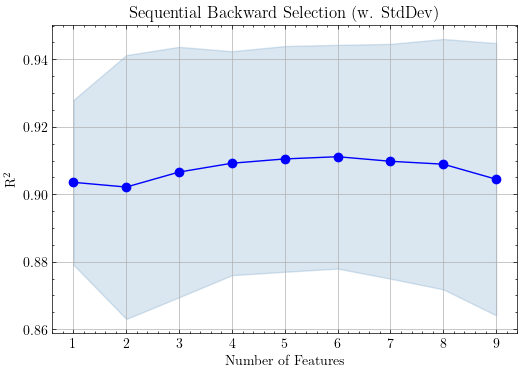

In [12]:
point_reg.sequential_selection_mlxtend(direction='backward',n_features=1)

## Tree-based Feature Selection



### Based on MDI
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. \
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity

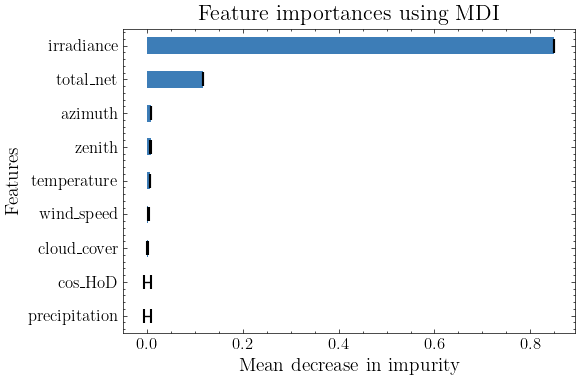

In [13]:
point_reg.tree_based_selection_MDI()

### Based on Permutation
Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set. \
https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance
\
High-cardinality categorical features are those that have a large number of unique values, such as product IDs, zip codes, or names.

/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted w

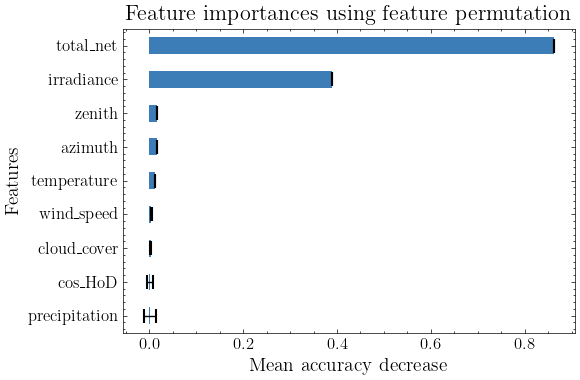

In [14]:
point_reg.tree_based_selection_permutation()

# Comparison between regressors

In [15]:
point_reg.selected_features=list_of_features_selected

Using selected features: ['irradiance_norm', 'total_net_norm']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7328, number of used features: 2
[LightGBM] [Info] Start training from score 0.262871
         R2  Adjusted R2      RMSE
0  0.945129     0.944983  0.034382
1  0.945503     0.945358  0.034265
2  0.957130     0.957016  0.030390


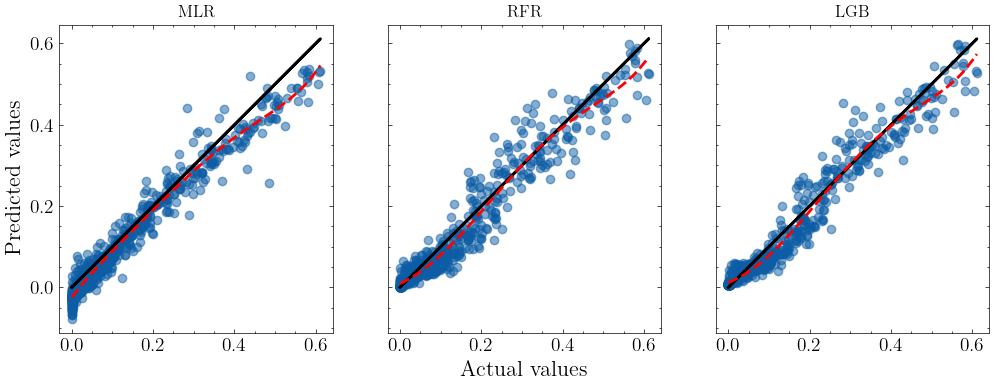

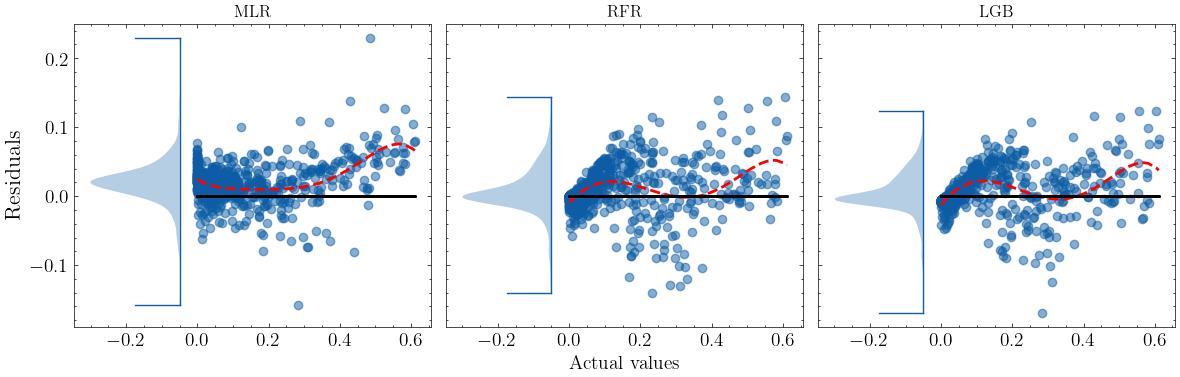

In [16]:
point_reg.compare_regressors()

Using selected features: ['irradiance_norm', 'total_net_norm']
shape of y_test (8232,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7328, number of used features: 2
[LightGBM] [Info] Start training from score 0.262871


/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/jhe/prjs/envs_py/thesis-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


shape of y_pred_rfr (8232,)


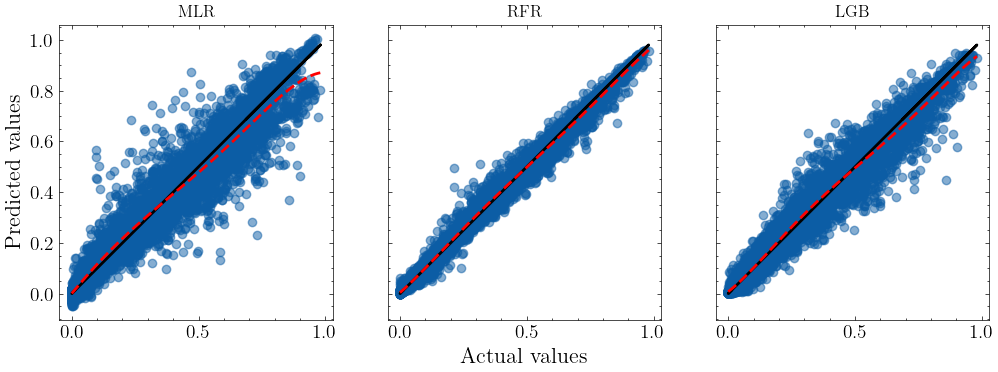

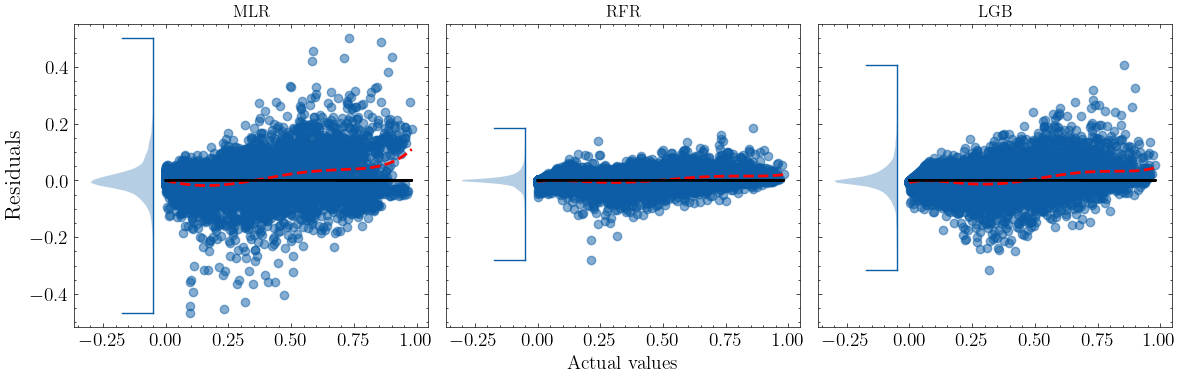

In [17]:
point_reg.compare_regressors_on_train(fname1="regressor_comparison1_on_train.pdf",fname2="regressor_comparison2_on_train.pdf")

## Visualize the results

### On Training Set

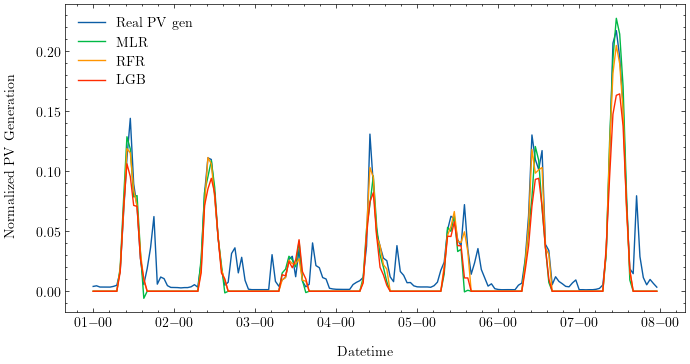

In [18]:
point_reg.visualize_results_by_dates_2018_Jan_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

Too little households are available in January, so the results might not be as good as other time.

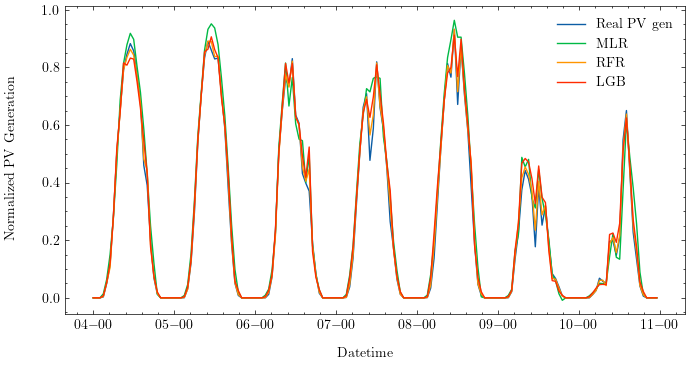

In [19]:
point_reg.visualize_results_by_dates_2018_jul_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

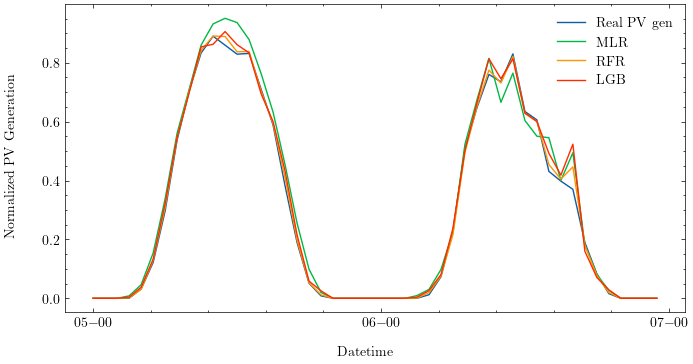

In [20]:
point_reg.visualize_results_by_dates_2018_jul_2days(legends=['Real PV gen','MLR', "RFR","LGB"])

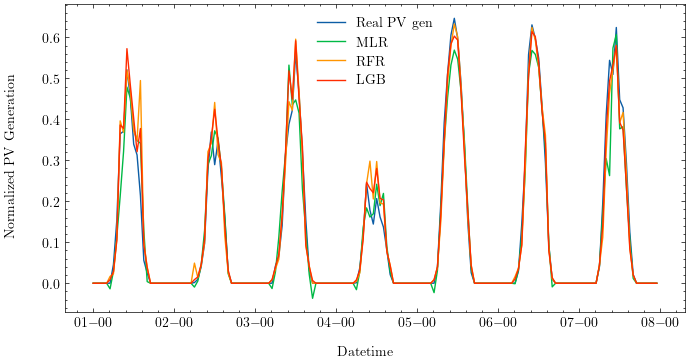

In [21]:
point_reg.visualize_results_by_dates_2018_sep_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

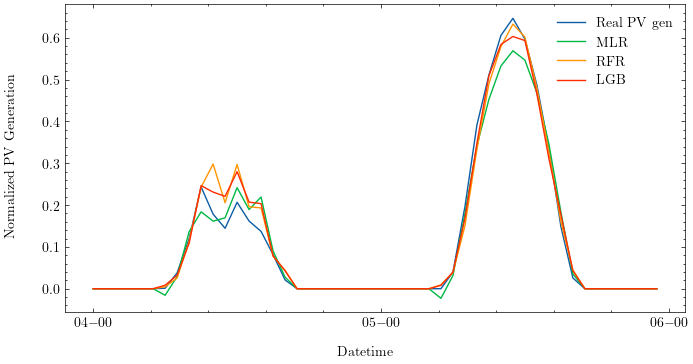

In [22]:
point_reg.visualize_results_by_dates_2018_sep_2days(legends=['Real PV gen','MLR', "RFR","LGB"])

### On Test Set

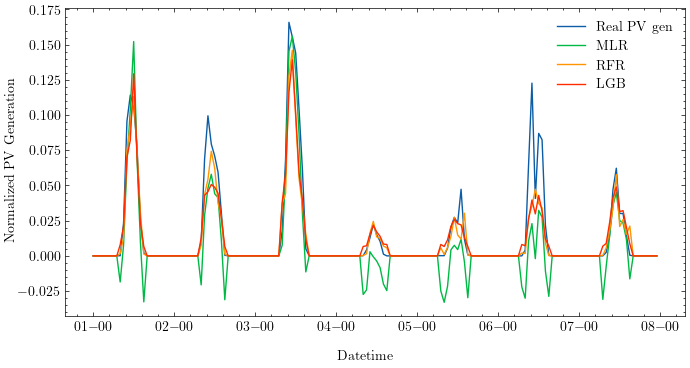

In [23]:
point_reg.visualize_results_by_dates_2019_jan_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

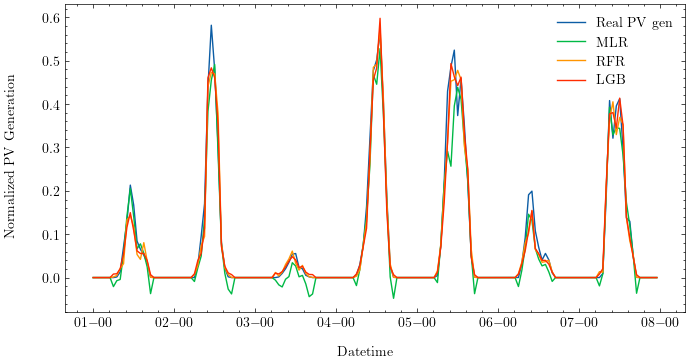

In [24]:
point_reg.visualize_results_by_dates_2019_Mar_7days(legends=['Real PV gen','MLR', "RFR","LGB"])

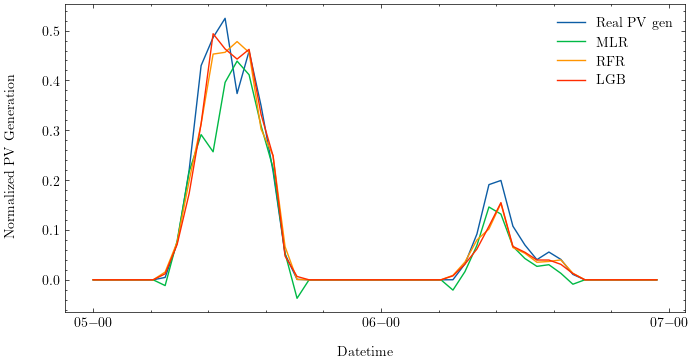

In [25]:
point_reg.visualize_results_by_dates_2019_Mar_2days(legends=['Real PV gen','MLR', "RFR","LGB"])